In [1]:
# %%  imports 
import numpy as np
import pandas as pd
import os
from pyextremes import EVA

In [2]:
snr = np.genfromtxt('channel_1597_SNR.csv', dtype='float',delimiter=',')
snr = pd.Series(snr)
type(snr)

pandas.core.series.Series

In [3]:
def get_list_simulations(root_dir):
    """
    Get a list with all the name of the simulation csv files.
    """
    file_list_simulations = []
    for _, file in enumerate(os.listdir(root_dir)):
        file_list_simulations.append(file)
    return file_list_simulations

def get_dict_scenario_txt(file_list_simulations):
    """
    Build dictionary of scenario number and the corresponding name of the csv file
    with simulation data.
    """
    simulation_files_dict = {}
    for file_name in file_list_simulations:
        if file_name.endswith('.docx'):
            continue
        else:
            #simulation_files_dict[str(file_name.split("_")[1]) + '_' + str(file_name.split("_")[3].rstrip('.txt'))] = file_name
            simulation_files_dict[str(file_name.split("_")[1])] = file_name
    return simulation_files_dict
# def read_txt_to_df(file, root_dir):
#     """
#     read individual channel txt file to a df
#     """
#     file_path = os.path.join(root_dir, file)
#     #df = pd.read_csv(file_path, sep='\t', header=[0,1])
#     df = pd.read_csv(file_path, sep='\t')
#     columns = ["date", "Q-factor", "Power", "CD", "PMD"] 
#     df.columns = columns
#     df = convert_objects_to_float(df)
#     return df
def read_txt_to_series(file, root_dir):
    """
    read individual channel txt file to a df
    """
    file_path = os.path.join(root_dir, file)
    #df = pd.read_csv(file_path, sep='\t', index_col=0, parse_dates = True, squeeze=True)
    #columns = ["Q-factor", "Power", "CD", "PMD"] 
    df = pd.read_csv(file_path, sep='\t', parse_dates = True, squeeze=True)
    columns = ["Date","Q-factor", "Power", "CD", "PMD"] 
    df.columns = columns
    #df = convert_objects_to_float(df)
    return df
def convert_objects_to_float(df: pd.DataFrame) -> pd.DataFrame:
    """
    Convert columns with object dtype to floats in order to use them in models.
    """
    indicator = df.dtypes == 'object'
    categorical_columns = df.columns[indicator].tolist()
    for col in categorical_columns:
        try:
            df[col] = df[col].astype('float')
        except:
            continue
    return df

In [4]:
# get files and make a dictionary 
root_dir = '/Users/joshnevin/Desktop/MicrosoftDataset'
file_list_simulations= get_list_simulations(root_dir)
simulation_files_dict = get_dict_scenario_txt(file_list_simulations)

In [5]:
channel = '1597'
df = read_txt_to_series(simulation_files_dict[channel], root_dir)

In [6]:
df = df.drop(columns=['Power','CD','PMD'])

In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y.%m.%d.%H.%M.%S')

In [9]:
df = df.set_index('Date')

In [10]:
series = df.squeeze()

In [11]:
type(series)

pandas.core.series.Series

Need to work out how best to split the timeseries up into contiguous batches. One crude way would be to convert the time column to timestamps as before and use this to find the indices. 

In [15]:
series.iloc[1]

13.29

In [12]:
model = EVA(series)

/Users/joshnevin/ext_val_stats/evs_env/lib/python3.8/site-packages/pyextremes/eva.py:100: RuntimeWarning: `data` index is not sorted in ascending order - sorting `data` by index
  warnings.warn(message=message, category=RuntimeWarning)


In [13]:
model.get_extremes(method="BM", block_size="1H")

ValueError: no data in block [2015-02-16 12:15:00 ; 2015-02-16 13:15:00), fill gaps in the data or set the argument 'errors' to 'coerce' or 'ignore'

(<Figure size 768x480 with 1 Axes>,
 <AxesSubplot:xlabel='Date', ylabel='Q-factor'>)

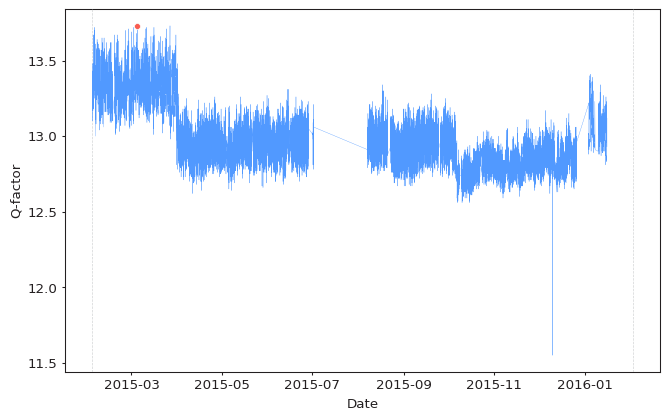

In [51]:
model.plot_extremes()